In [90]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy
import math

from plotly.subplots import make_subplots

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from itertools import product

%matplotlib inline

In [19]:
# Lectura de archivo csv
df_original = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_II_Proyecto_1/main/data/ecommerce-data.csv", sep=",")

# Obtener los 10 primeros registros
df_original.head(10)

,Reviews,Reviews_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Purchase
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [31]:
df_original[['Weekend', 'Purchase']] = df_original[['Weekend', 'Purchase']].astype(int)
df_original[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']] = df_original[['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']].astype(str)

In [28]:
# Variables numéricas
df_nums = df_original.select_dtypes(include=['int64', 'int32', 'float64'])

In [29]:
df_cats = df_original.select_dtypes(include=['object'])

In [32]:
df_cats_dummies = pd.get_dummies(df_cats)

In [59]:
df = pd.concat([df_nums, df_cats_dummies], axis=1)

---

In [60]:
X = df.drop('Purchase', axis=1)
y = df['Purchase']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Tamaño del conjunto de entrenamiento: ', X_train.shape)
print('Tamaño del conjunto de validación: ', X_test.shape)

Tamaño del conjunto de entrenamiento:  (9864, 74)
Tamaño del conjunto de validación:  (2466, 74)


---

## <font color='056938'> **Árboles de Decisión** </font>
---

In [62]:
# Entrenamiento del modelo
# ==============================================================================
clf = tree.DecisionTreeClassifier(
          criterion = 'gini', # por ser problema de clasificación se usa 'gini' pero hay más
          max_depth = 6, # la rama más profunda va a tener 6 nodos
          max_leaf_nodes=10, # n max de nodos hoja = 10
          random_state=0) 
clf.fit(X_train, y_train) #ajuste del modelo

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=0)

In [63]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, clf.predict(X_train), digits=4))
print ("Test - Accuracy :", metrics.accuracy_score(y2_test, clf2.predict(X2_test)))
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test), digits=4))

Train - Accuracy : 0.907441200324412
Train - classification report:
               precision    recall  f1-score   support

           0     0.9327    0.9602    0.9462      8367
           1     0.7336    0.6126    0.6676      1497

    accuracy                         0.9074      9864
   macro avg     0.8331    0.7864    0.8069      9864
weighted avg     0.9025    0.9074    0.9040      9864

Test - Accuracy : 0.8929440389294404
Test - classification report :               precision    recall  f1-score   support

           0     0.9210    0.9533    0.9369      2055
           1     0.7168    0.5912    0.6480       411

    accuracy                         0.8929      2466
   macro avg     0.8189    0.7723    0.7924      2466
weighted avg     0.8870    0.8929    0.8887      2466



In [68]:
print ("Train - recall:\n", metrics.recall_score(y_train, clf.predict(X_train)))
print ("Test - recall :", metrics.recall_score(y_test, clf.predict(X_test)))

Train - recall:
 0.612558450233801
Test - recall : 0.5912408759124088


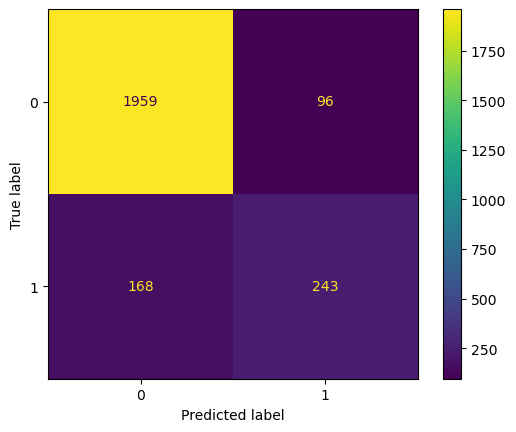

In [70]:
# Matriz de confusion
cm = confusion_matrix(y_test, clf.predict(X_test))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

Profundidad del árbol: 4
Número de nodos terminales: 10


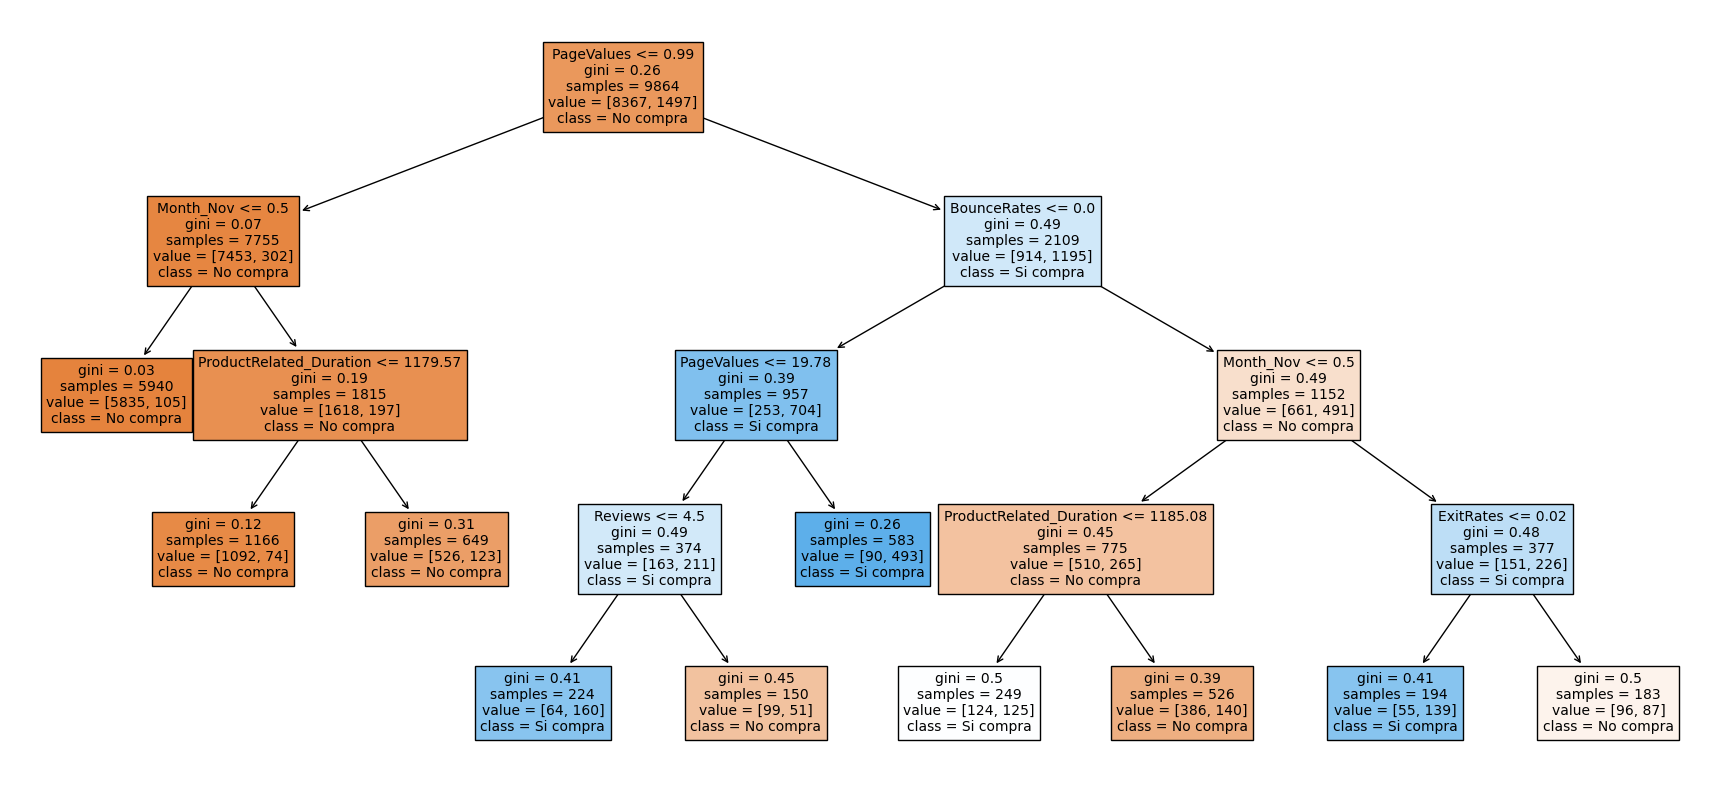

In [74]:
# Visualización del arbol
# ==============================================================================

fig, ax = plt.subplots(figsize=(22, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = X.columns.tolist(),
            class_names   = ['No compra', 'Si compra'],
            filled        = True,
            impurity      = True,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

## <font color='056938'> **Random Forest** </font>
---

In [82]:
# Entrenamiento del modelo
# ==============================================================================
ranfor = RandomForestClassifier(
            n_estimators = 150,
            criterion    = 'gini',
            max_depth    = 5,
            max_leaf_nodes = 10,
            n_jobs       = -1,
            random_state = 123
         )
ranfor.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, n_estimators=150,
                       n_jobs=-1, random_state=123)

In [83]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, ranfor.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, ranfor.predict(X_test)))

Train - Accuracy : 0.8482360097323601
Train - classification report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8367
           1       0.00      0.00      0.00      1497

    accuracy                           0.85      9864
   macro avg       0.42      0.50      0.46      9864
weighted avg       0.72      0.85      0.78      9864

Test - Accuracy : 0.8333333333333334
Test - classification report :               precision    recall  f1-score   support

           0       0.83      1.00      0.91      2055
           1       0.00      0.00      0.00       411

    accuracy                           0.83      2466
   macro avg       0.42      0.50      0.45      2466
weighted avg       0.69      0.83      0.76      2466



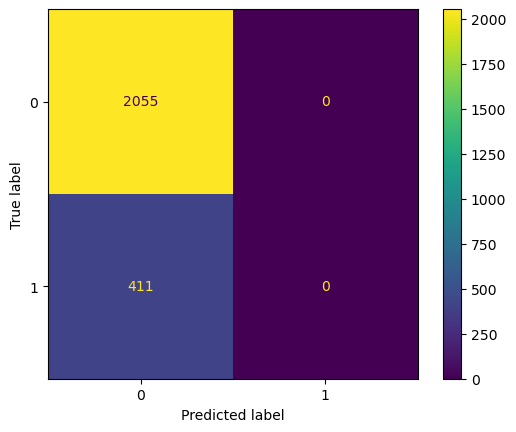

In [89]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm = confusion_matrix(y_test, ranfor.predict(X_test))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

## <font color='056938'> **Gradient Boosting Classifier** </font>
---

In [92]:
# Entrenamiento del modelo: N_ESTIMATORS = 100, LEARNING_RATE = 0.1, , MAX_DEPTH = 4
# ===================================================================================
gboos = GradientBoostingClassifier(
            n_estimators = 100,
            learning_rate= 0.1,
            max_depth = 4,
            random_state = 123
         )
gboos.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=123)

In [93]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, gboos.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, gboos.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, gboos.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, gboos.predict(X_test)))

Train - Accuracy : 0.9334955393349554
Train - classification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      8367
           1       0.84      0.69      0.76      1497

    accuracy                           0.93      9864
   macro avg       0.89      0.83      0.86      9864
weighted avg       0.93      0.93      0.93      9864

Test - Accuracy : 0.8933495539334956
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2055
           1       0.73      0.58      0.64       411

    accuracy                           0.89      2466
   macro avg       0.82      0.77      0.79      2466
weighted avg       0.89      0.89      0.89      2466



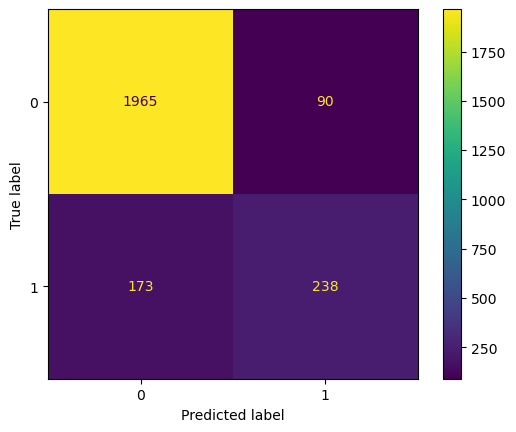

In [95]:
# Matriz de confusión
# ==============================================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm = confusion_matrix(y_test, gboos.predict(X_test))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

## <font color='056938'> **XGBoost Classifier** </font>
---

In [97]:
#%pip install xgboost
from xgboost import XGBClassifier
# Entrenamiento del modelo: N_ESTIMATORS = 100, LEARNING_RATE = 0.1, , MAX_DEPTH = 4
# ===================================================================================
xgb = XGBClassifier(
    n_estimators = 100,
    learning_rate= 0.1,
    max_depth = 4,
    random_state = 123
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [98]:
# Métricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, xgb.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, xgb.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, xgb.predict(X_test)))
print ("Test - classification report :", metrics.classification_report(y_test, xgb.predict(X_test)))

Train - Accuracy : 0.9290348742903487
Train - classification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      8367
           1       0.83      0.67      0.74      1497

    accuracy                           0.93      9864
   macro avg       0.89      0.82      0.85      9864
weighted avg       0.93      0.93      0.93      9864

Test - Accuracy : 0.8982157339821574
Test - classification report :               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2055
           1       0.74      0.59      0.66       411

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.89      0.90      0.89      2466



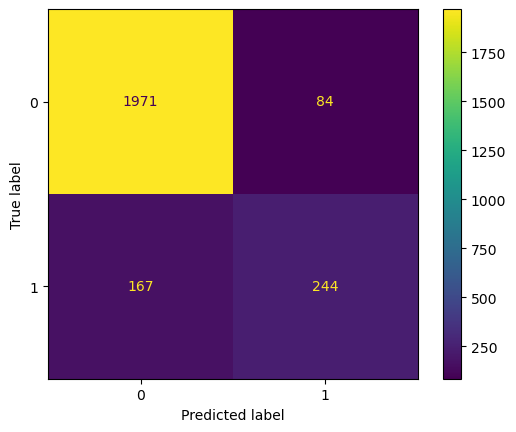

In [99]:
# Matriz de confusión
# ==============================================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Matriz de confusion
cm = confusion_matrix(y_test, xgb.predict(X_test))
# Visualización de la matriz de confusion
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

## <font color='056938'> **Support Vector Machine** </font>
---